In [1]:
__author__ = 'Guillermo Damke <gdamke@gmail.com>, Mauricio Araya <maray@inf.utfsm.cl>' # single string; emails in <>
__version__ = '20240802' # yyyymmdd; version datestamp of this notebook
__datasets__ = ['Kaggle FIFA 19 complete player dataset', 'data.csv']  # enter used datasets by hand
__keywords__ = ['Introduction to Machine Learning', 'Exploratory Analysis', 'La Serena School for Data Science']

<hr/>

# Introduction to Machine Learning

*In original form by Mauricio Araya, Universidad Técnica Federico Santa María, Chile. Adaptated for DataLab by Guillermo Damke.*

#### This notebook is part of the curriculum of the 2019 La Serena School for Data Science

<hr/>

## 0 - Import necessary packages:



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1 - Reactive vs Learning Agent

<b>NOTE</b>: We will use the `numpy` package for vector-based computations

### 1.1 - A very simple machine that learns a pattern.

* A <b>reactive agent</b> is a program that reacts to a predefined set of rules (patterns), for example:

In [3]:
def reactive_agent(x):
    if x > 10.0:
        return True
    else:
        return False
    
vreact = np.vectorize(reactive_agent)

* Given some data, it applies the rules:



In [4]:
# Some data:
X = np.array([10.9, 5.34, 8.32, 12.43, 20.32, 7.24])

# Apply the rule:
y = vreact(X)
print(y)

[ True False False  True  True False]


In [5]:
vtrue = np.mean(X[y==True])
vfalse = np.mean(X[y==False])
x = 10.75
print(np.abs(x - vtrue))
print(np.abs(x - vfalse))
print((vtrue + vfalse)/2)

3.799999999999999
3.783333333333334
10.758333333333333


* A <b>learning agent</b>, learns from data (in this case labels) to infer the pattern.

In [6]:
def learning_agent(x,Data,labels):
    v_true  = np.mean(Data[labels==True])
    v_false = np.mean(Data[labels==False])
    d_true  = np.abs(x - v_true)
    d_false  = np.abs(x - v_false)
    if d_true < d_false:
        return True
    else:
        return False
    

Let us define a random vector of data to test:

In [7]:
vect = np.random.random(10)*20
learnag = lambda a: learning_agent(a,X,y)
vlearn = np.vectorize(learnag)

print(vect)
vlearn(vect)

[ 5.12933981 19.25349126  2.45309899  8.65465816 12.97568636 16.19865587
 13.36067572 13.04173347 18.45319491 12.30825022]


array([False,  True, False, False,  True,  True,  True,  True,  True,
        True])

Which pattern is the learning machine using?

In [8]:
def get_pattern():
    v_true  = np.mean(X[y==True])
    v_false = np.mean(X[y==False])
    return (v_true + v_false)/2

get_pattern()

10.758333333333333

### 1.2 - How the pattern evolve with the data size?

* Let us now change `X` and `y` for a random vector and the output of the ractive agent respectively.

In [9]:
# Create a function that generates n data points randomly and evaluate by the reactive agent:
scale = 20.0
def generate_data(n):
    X = np.random.rand(n)*scale
    y = vreact(X)
    return(X,y)

* And see how the pattern behave...

In [10]:
X,y = generate_data(100)
get_pattern()

9.785517138446217

* Now, we will repeat that many times, for multiple values of `n`. We will record the mean and the standard deviation for each value of `n`.

In [11]:
n_values =np.arange(10,1000,10) # Values of n
reps = 100 # Number of repetitions for each n
pmean = []
pvar = []
for n in n_values:
    pm = 0
    pv = 0
    for i in range(reps):
        X,y = generate_data(int(n))
        val = get_pattern()
        pm += val 
        pv += val*val
    pm=pm/float(reps)
    pv=np.sqrt(pv/float(reps)- pm*pm)
    pmean.append(pm)   
    pvar.append(pv)
pmean=np.array(pmean)
pvar=np.array(pvar)

* And plot the mean and variance using the `matplotlib` library.

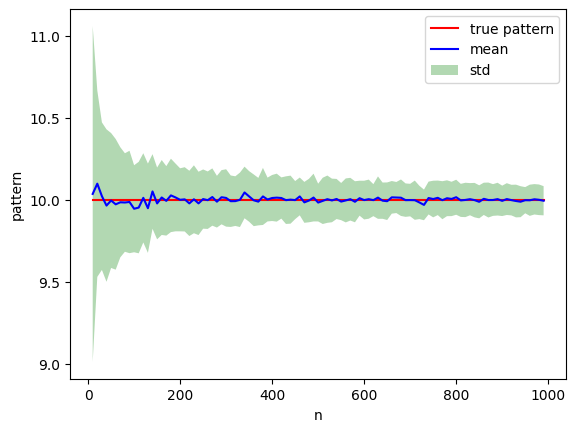

In [12]:
%matplotlib inline

plt.plot(n_values,np.ones(len(n_values))*10,color='red',label='true pattern')
plt.plot(n_values,pmean,color='blue',label='mean')
plt.fill_between(n_values, pmean + pvar, pmean-pvar, facecolor='green', alpha=0.3,label="std")
plt.legend()
plt.ylabel("pattern")
plt.xlabel("n")
plt.show()

### 1.3 - What about wrong labels?
* Labels are not always reliable. 
* To simulate this, let us fix `n = 1000` and randomly modify labels.

In [13]:
reps = 200 # Number of repetitions for each run.
n = 1000 
jvals =np.arange(1,1000,5) # Number of values to modify randomly in each run.
pmean = []
pvar = []
for j in jvals: 
    pm = 0
    pv = 0
    for i in range(reps):
        X,y = generate_data(int(n))
        inds = np.random.choice(y.size, size=j,replace=False)
        y[inds]=np.invert(y[inds])
        val = get_pattern()
        pm += val 
        pv += val*val
    pm = pm/float(reps)
    pv = np.sqrt(pv/float(reps)- pm*pm)
    pmean.append(pm)   
    pvar.append(pv)
pmean = np.array(pmean)
pvar = np.array(pvar)

* And plot the mean and variance w.r.t. the number of random changes

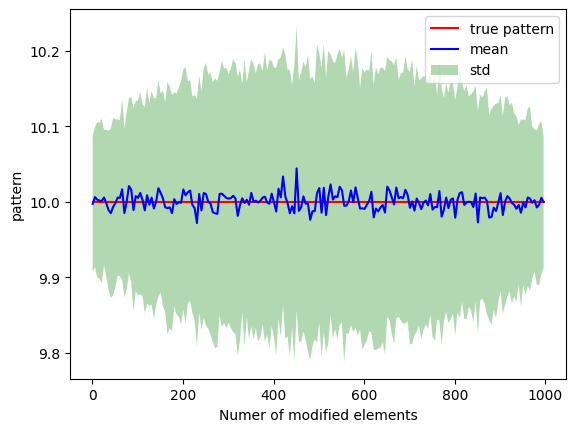

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(jvals,np.ones(len(jvals))*10,color='red',label='true pattern')
plt.plot(jvals,pmean,color='blue',label='mean')
plt.fill_between(jvals, pmean + pvar, pmean-pvar, facecolor='green', alpha=0.3,label="std")
plt.legend()
plt.ylabel("pattern")
plt.xlabel("Numer of modified elements")
plt.show()

## 2 - Exploratory Analysis in 7 Questions About Data

We will explore the FIFA 2019 data (you can find it in Kaggle). 

Here is the textbook data science process.

![Data Science](Figures/Data-Science-Process.png)

However, in practice one goes back and forward to achieve an exploratory data analysis.

### 2.1 - What is the data made of?

* FIFA data comes in a `.csv` format
* We will use pandas package as our data manager, and it can read CSVs! Pandas was imported at the beginning as *pd*
* We can read a comma separated values file as a pandas dataframe (i.e. a Table object).

In [15]:
# Read the file using pandas:
table = pd.read_csv("Data/data.csv")


* To explore this data, first we need to check the column names and be sure about the semantics.

In [16]:
table.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl',
       'Body Type', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'Composure',
       'Contract Valid Until', 'Crossing', 'Curve', 'Dribbling', 'FKAccuracy',
       'Finishing', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning',
       'GKReflexes', 'HeadingAccuracy', 'Interceptions',
       'International Reputation', 'Jersey Number', 'Joined', 'Jumping', 'LAM',
       'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'Loaned From',
       'LongPassing', 'LongShots', 'Marking', 'Penalties', 'Position',
       'Positioning', 'Preferred Foot', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF',
       'RM', 'RS', 'RW', 'RWB', 'Reactions', 'Real Face', 'Release Clause',
       'ST', 'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
       'SprintSpeed', 'Stamina', '

* Let's check what is in these six relevant columns:

In [17]:
table[['Name','Age','Nationality','Overall','Potential','Value']]

,Name,Age,Nationality,Overall,Potential,Value
0,L. Messi,31,Argentina,94,94,€110.5M
1,Cristiano Ronaldo,33,Portugal,94,94,€77M
2,Neymar Jr,26,Brazil,92,93,€118.5M
3,De Gea,27,Spain,91,93,€72M
4,K. De Bruyne,27,Belgium,91,92,€102M
...,...,...,...,...,...,...
13720,W. Al Anazi,23,Saudi Arabia,62,69,€425K
13721,W. Jobello,24,France,62,67,€400K
13722,Rafhael Lucas,25,Brazil,62,67,€400K
13723,Luo Xin,28,China PR,62,63,€280K


* Check the first item in the "Value" column. First, we assign to variable "v" and then we display its content:

In [18]:
v=table['Value'][0]
v

'€110.5M'

* What variable type is "v"?

In [19]:
type(v)

str

Which shows that "Value" is represented as a "string" instead of a "float". We will fix that later.

Let's plot some data columns:

<Axes: xlabel='Overall', ylabel='Potential'>

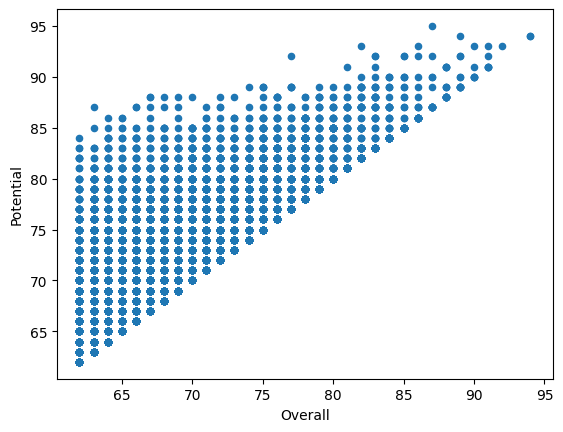

In [20]:
%matplotlib inline
table.plot.scatter("Overall","Potential")

Text(0.5, 1.0, 'All')

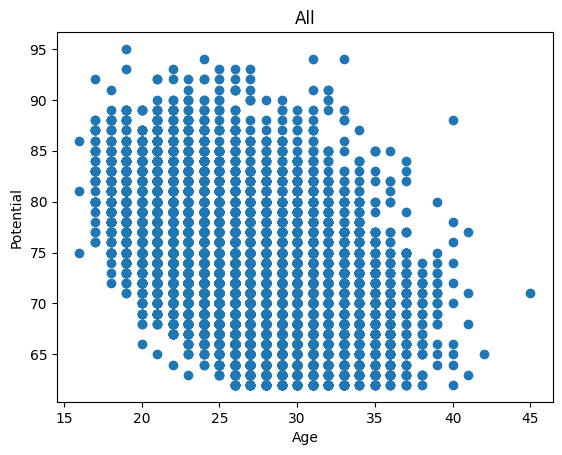

In [21]:
plt.clf()
plt.scatter(table.Age,table.Potential)
plt.xlabel("Age")
plt.ylabel("Potential")
plt.title("All")

### 2.2 - How to fix the Data?
* It is usual that not all fields in a dataset are used for every sample, and some values are in human-readable form but not in machine-readable form (not numerical, but String).
* Let's fix the currency values first

In [22]:
# Convert the "Value" and "Wage" columns in currency units from strings to floats.
# Then, we will add two columns (ValueNum and WageNum) with the respective numerical values.

table['Unit'] = table['Value'].str[-1]
table['ValueNum'] = np.where(table['Unit'] == '0', 0, 
                                    table['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
table['ValueNum'] = table['ValueNum'].astype(float)
table['ValueNum'] = np.where(table['Unit'] == 'M', 
                                    table['ValueNum'], 
                                    table['ValueNum']/1000)

table['Unit2'] = table['Wage'].str[-1]
table['WageNum'] = np.where(table['Unit2'] == '0', 0, 
                                    table['Wage'].str[1:-1].replace(r'[a-zA-Z]',''))
table['WageNum'] = table['WageNum'].astype(float)
table['WageNum'] = np.where(table['Unit2'] == 'M', 
                                    table['WageNum'], 
                                    table['WageNum']/1000)
table[['Value','ValueNum','Wage','WageNum']]

,Value,ValueNum,Wage,WageNum
0,€110.5M,110.500,€565K,0.565
1,€77M,77.000,€405K,0.405
2,€118.5M,118.500,€290K,0.290
3,€72M,72.000,€260K,0.260
4,€102M,102.000,€355K,0.355
...,...,...,...,...
13720,€425K,0.425,€5K,0.005
13721,€400K,0.400,€1K,0.001
13722,€400K,0.400,€1K,0.001
13723,€280K,0.280,€2K,0.002


* As a result, now can work with these data! Let's plot some of them:

Text(0, 0.5, 'Price [Millions of €]')

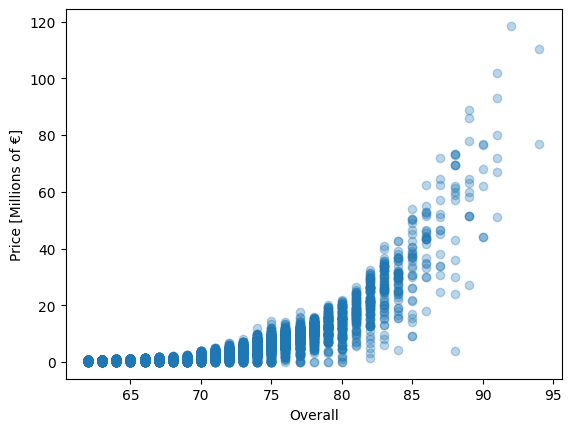

In [23]:
plt.figure()
plt.scatter(table['Overall'],table['ValueNum'],alpha=0.3)
plt.xlabel("Overall")
plt.ylabel("Price [Millions of €]")

### 2.3 - How do we organize the data?

One way to organize the data is by applying the "group by" function. Below, we will organize the data by grouping them by player "Nationality".

In [24]:
grouped = table.groupby('Nationality')

* We could now answer some questions. For example, what countries are most players coming from?

Let's pick and display the top-15 countries:

In [25]:
# Count how many items (players) are in each group.
counts = grouped.size()

# Sort from larger to smaller, and then pick the first 15.
top15 = counts.sort_values(ascending=False)[:15]
top15

Nationality
England          996
Spain            964
Germany          902
Brazil           823
Argentina        801
France           744
Italy            602
Colombia         472
Netherlands      375
Portugal         315
United States    281
Chile            278
Japan            277
Sweden           252
Mexico           252
dtype: int64

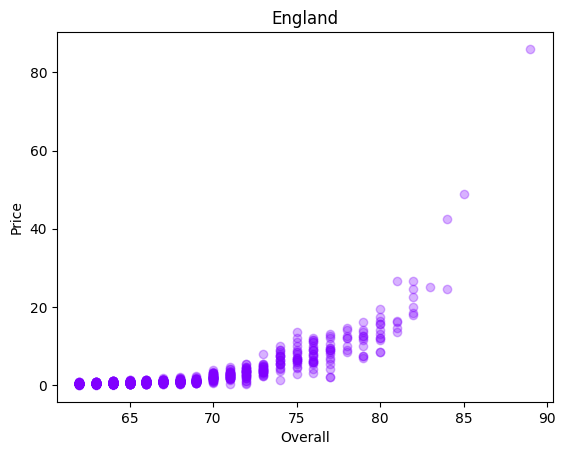

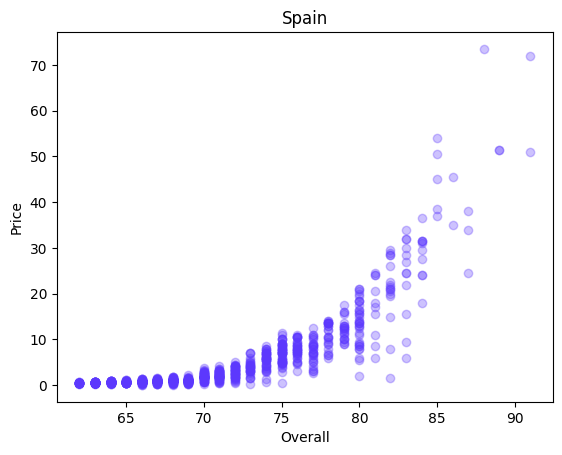

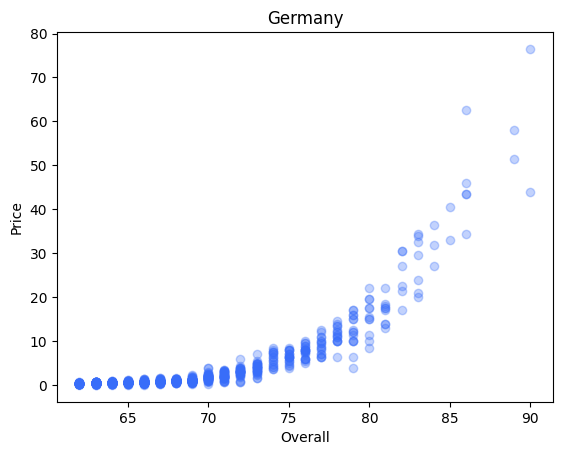

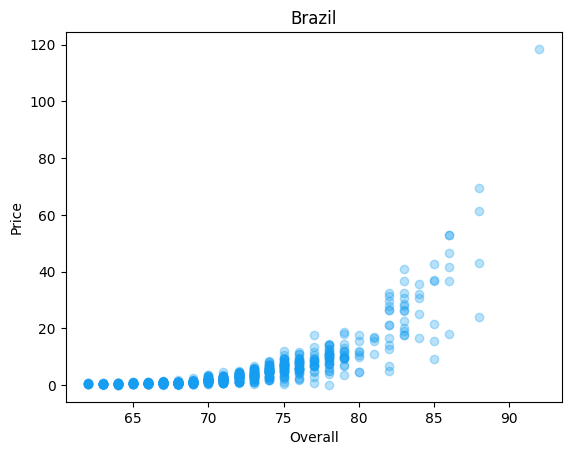

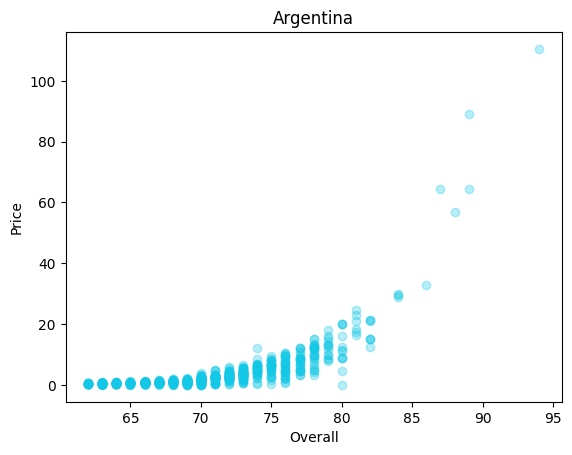

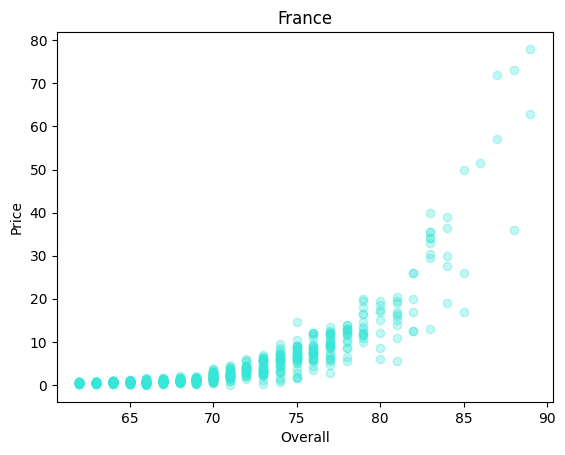

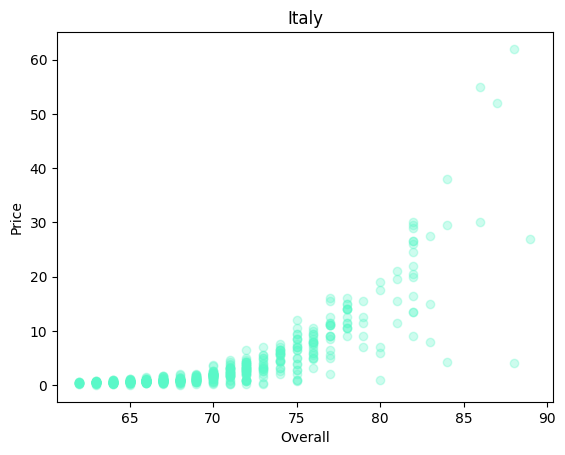

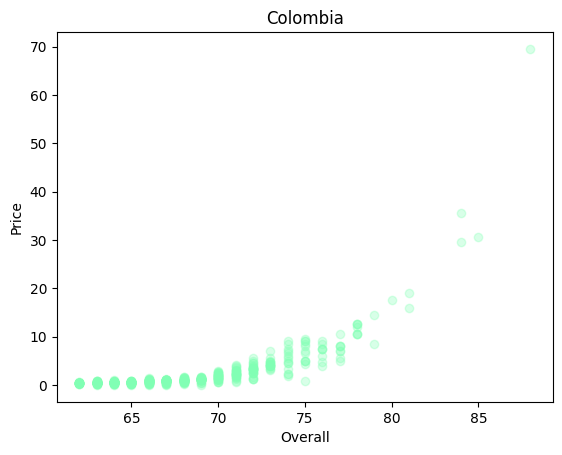

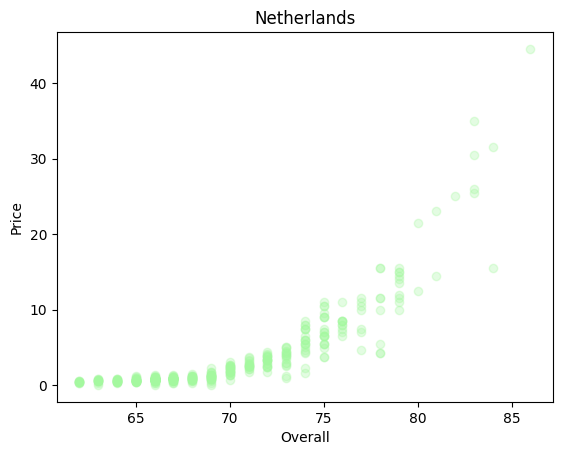

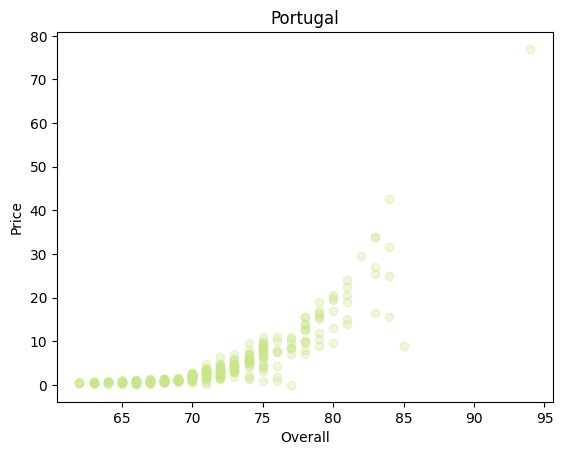

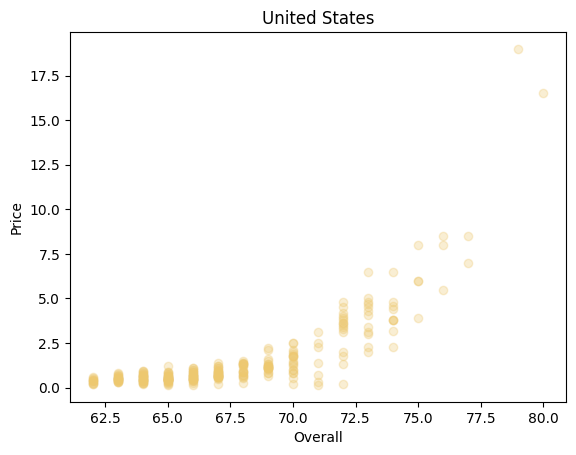

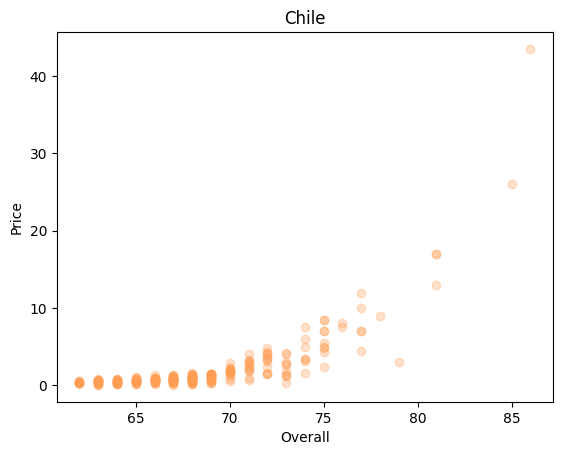

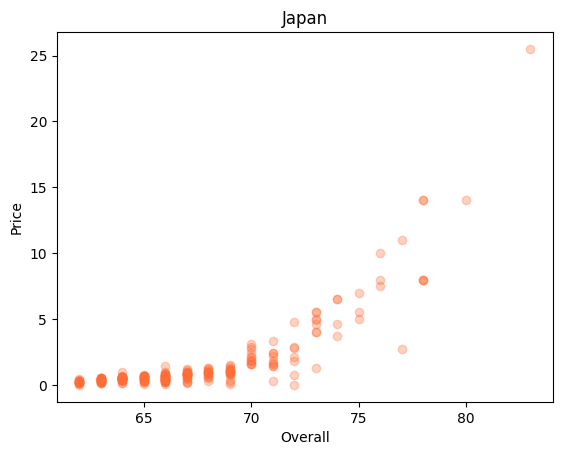

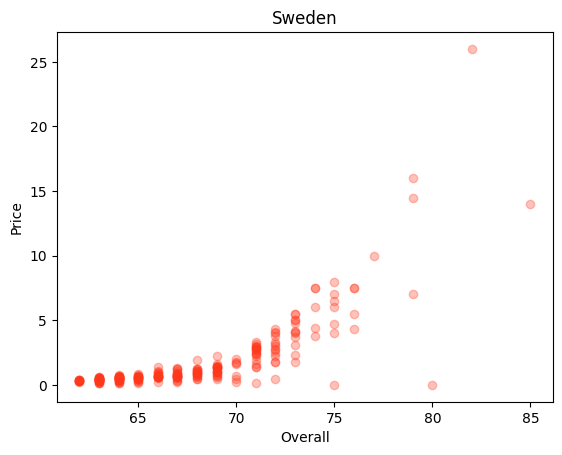

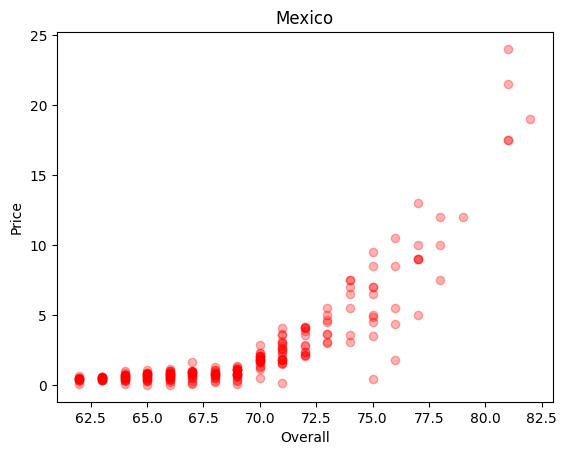

In [26]:
color = plt.cm.rainbow(np.linspace(0,1,top15.size)) # Apply different color to each plot based on total number.

for i, country in enumerate( top15.keys()):
    plt.figure()
    elms=grouped.groups[country]
    plt.scatter(table['Overall'][elms],table['ValueNum'][elms],color=color[i],alpha=0.3)
    plt.title(country)
    plt.xlabel("Overall")
    plt.ylabel("Price")

### 2.4 - How do we clean/select the data?

It is possible to remove missing value with the function "dropna".
We will remove columns with missing data.

In [27]:
fulltab = table.dropna(axis=1)
print(str(len(table.columns) - len(fulltab.columns)) + " columns removed for incompleteness")

34 columns removed for incompleteness


Let's check what columns were kept:

In [28]:
fulltab.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl',
       'Body Type', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'FKAccuracy', 'Finishing', 'GKDiving', 'GKHandling', 'GKKicking',
       'GKPositioning', 'GKReflexes', 'HeadingAccuracy', 'Interceptions',
       'Jumping', 'LongPassing', 'LongShots', 'Marking', 'Penalties',
       'Positioning', 'Preferred Foot', 'Reactions', 'Real Face',
       'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
       'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
       'Volleys', 'Weak Foot', 'Work Rate', 'Unit', 'ValueNum', 'Unit2',
       'WageNum'],
      dtype='object')

Select features (columns) of the data that contain numerical data:

In [29]:
num_feat = ['Age', 'Overall', 'Potential', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl',
       'Composure', 'Crossing', 'Curve', 'Dribbling',
       'FKAccuracy', 'Finishing', 'GKDiving', 'GKHandling', 'GKKicking',
       'GKPositioning', 'GKReflexes', 'HeadingAccuracy', 'Interceptions',
       'Jumping', 'LongPassing', 'LongShots', 'Marking', 'Penalties',
       'Positioning', 'Reactions',
       'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
       'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
       'Volleys','ValueNum','WageNum']
santab=fulltab[num_feat].astype(float)
santab

,Age,Overall,Potential,Special,Acceleration,Aggression,Agility,Balance,BallControl,Composure,...,Skill Moves,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,ValueNum,WageNum
0,31.0,94.0,94.0,2195.0,91.0,48.0,91.0,95.0,96.0,96.0,...,4.0,26.0,86.0,72.0,28.0,59.0,94.0,86.0,110.500,0.565
1,33.0,94.0,94.0,2228.0,89.0,63.0,87.0,70.0,94.0,95.0,...,5.0,23.0,91.0,88.0,31.0,79.0,82.0,87.0,77.000,0.405
2,26.0,92.0,93.0,2143.0,94.0,56.0,96.0,84.0,95.0,94.0,...,5.0,33.0,90.0,81.0,24.0,49.0,87.0,84.0,118.500,0.290
3,27.0,91.0,93.0,1471.0,57.0,38.0,60.0,43.0,42.0,68.0,...,1.0,13.0,58.0,43.0,21.0,64.0,68.0,13.0,72.000,0.260
4,27.0,91.0,92.0,2281.0,78.0,76.0,79.0,77.0,91.0,88.0,...,4.0,51.0,76.0,90.0,58.0,75.0,94.0,82.0,102.000,0.355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13720,23.0,62.0,69.0,1677.0,60.0,65.0,74.0,72.0,60.0,53.0,...,2.0,56.0,66.0,77.0,57.0,60.0,60.0,37.0,0.425,0.005
13721,24.0,62.0,67.0,1557.0,72.0,39.0,64.0,62.0,61.0,51.0,...,2.0,19.0,70.0,60.0,17.0,57.0,55.0,64.0,0.400,0.001
13722,25.0,62.0,67.0,1696.0,78.0,33.0,66.0,76.0,66.0,44.0,...,2.0,43.0,83.0,54.0,45.0,56.0,53.0,59.0,0.400,0.001
13723,28.0,62.0,63.0,1602.0,57.0,63.0,71.0,64.0,57.0,55.0,...,2.0,61.0,63.0,68.0,64.0,66.0,60.0,44.0,0.280,0.002


### 2.5 - Does the content of our data make sense?

It is usual to explore the data visually as a quick way to check if the content makes sense. For this, create a function to plot a correlation matrix of the data and plot the selected numerical features after:

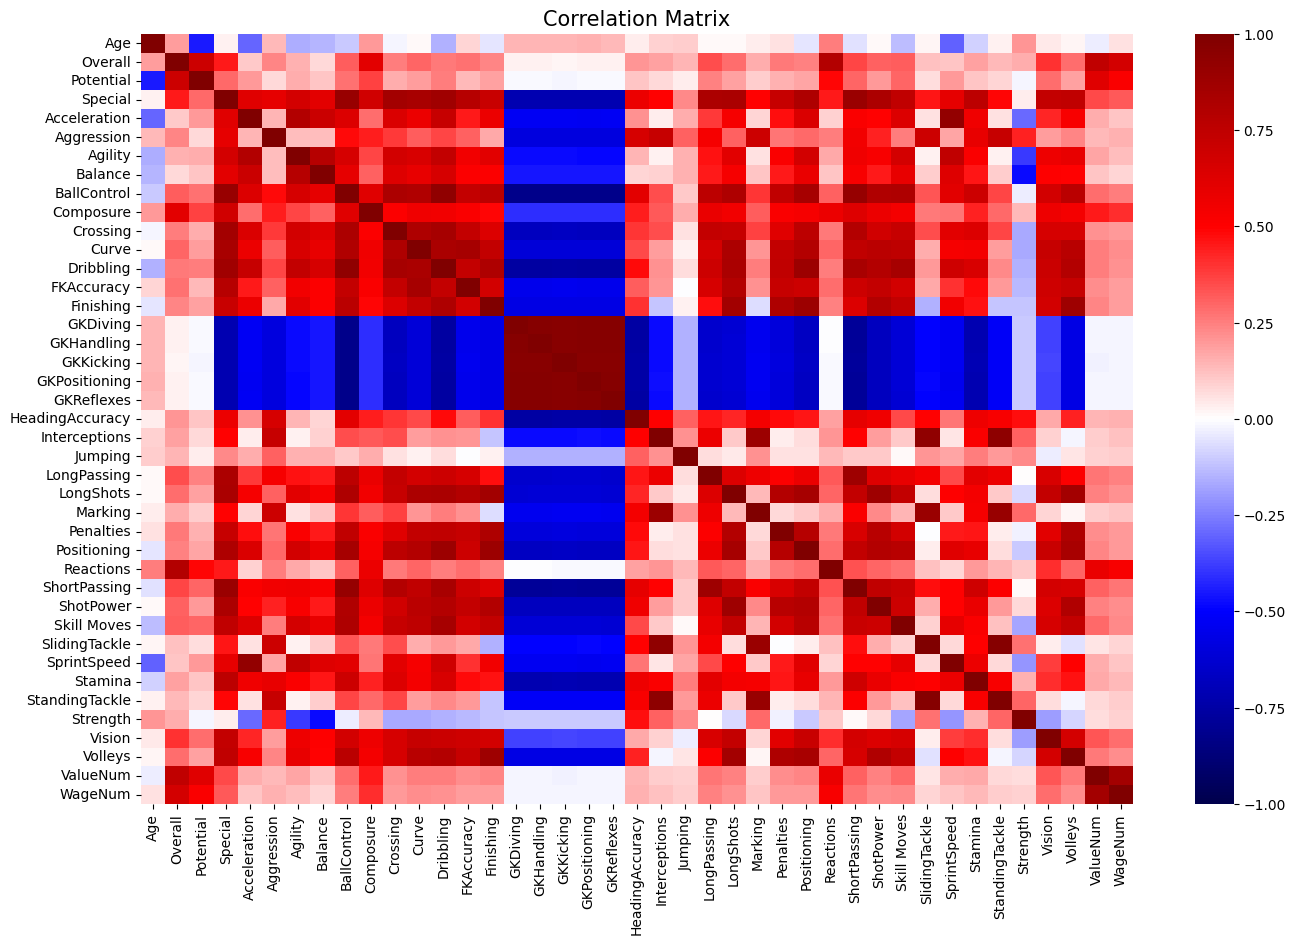

In [30]:
def plot_corr_matrix(data,features=None,annot=True,s=(16,10)):
    fig= plt.figure(figsize=s)
    ax= fig.add_subplot(111)
    if features is None:
        corr = data.corr()
    else:
        corr = data[features].corr()
    ax= sns.heatmap(corr, annot=annot, xticklabels=corr.columns,
    yticklabels=corr.columns, cmap="seismic",vmin=-1,vmax=1)
    plt.title("Correlation Matrix", fontsize = 15)
    plt.show()
    
plot_corr_matrix(santab,annot=False)

Plotting only a subset of features:

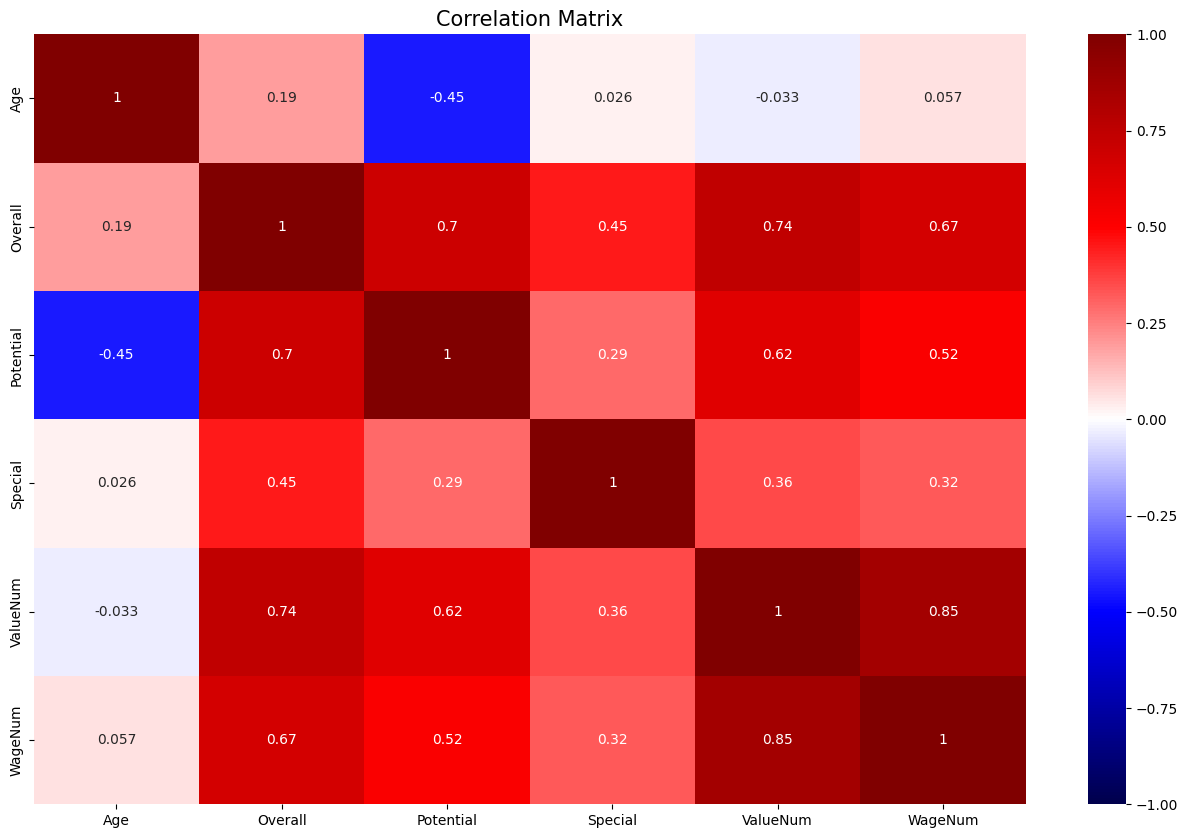

In [31]:
feat_select = ['Age','Overall',
       'Potential', 'Special','ValueNum','WageNum']
plot_corr_matrix(santab,features=feat_select)

### 2.6 - Can we simplify things?

In this example, we use *Principal Component Analysis* (PCA) to reduce dimensionality of the data. How many components (features) do we need to describe the variance in the data?

Text(0.5, 0, 'components')

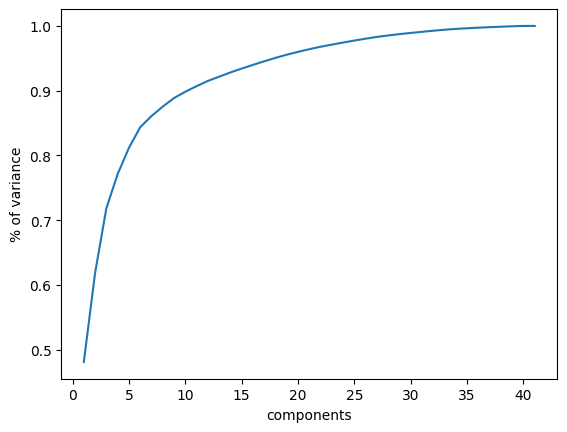

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(santab)
stdtab = pd.DataFrame(scaler.transform(santab))
n = len(stdtab.columns)
sklearn_pca = PCA(n_components=n,random_state=1)
xpca = sklearn_pca.fit_transform(stdtab)
varx=sklearn_pca.explained_variance_ratio_
plt.plot(np.arange(1,n+1),varx.cumsum())
plt.ylabel("% of variance")
plt.xlabel("components")

We can check the weights of all components with respect to the features:

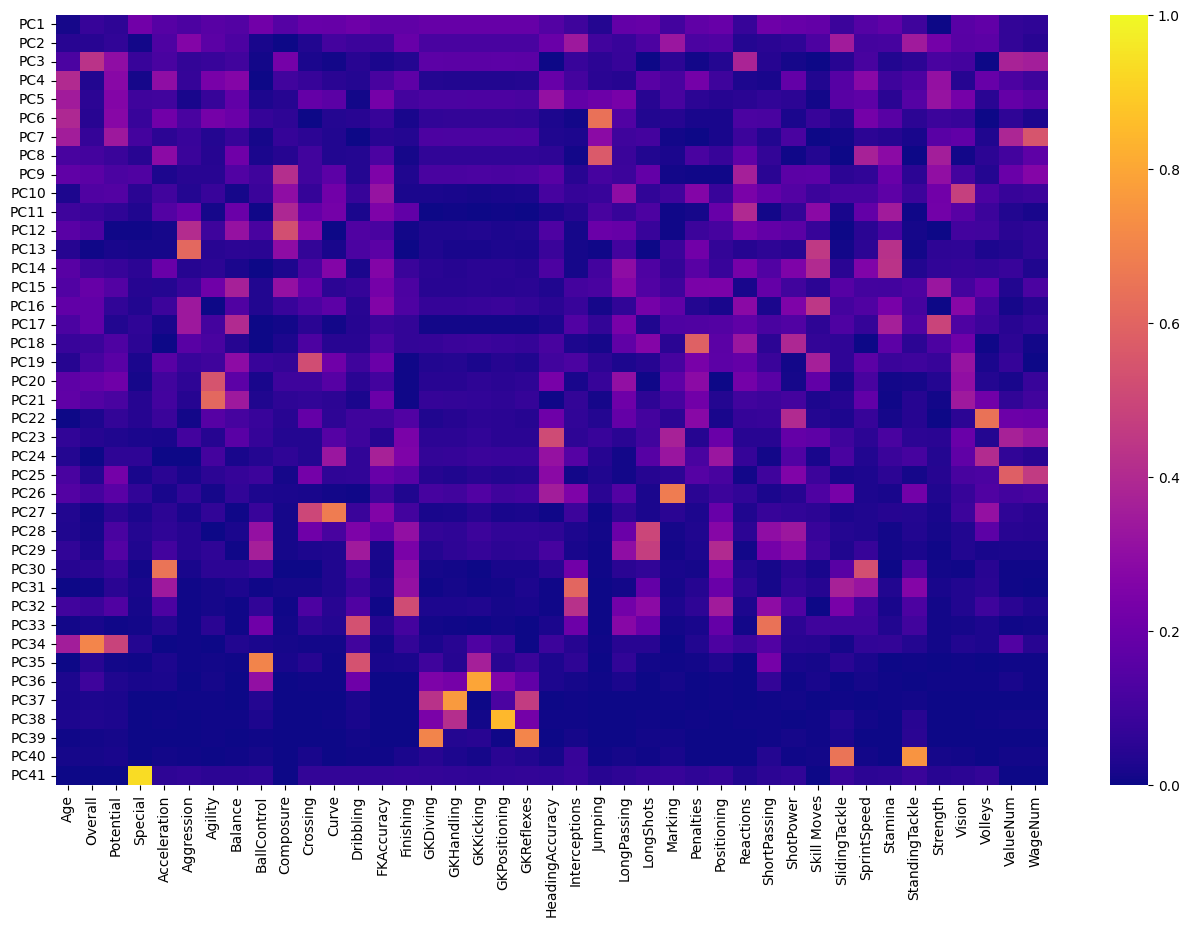

In [33]:
components = sklearn_pca.components_
ind = []
for i in range(components.shape[0]):
    ind.append("PC"+str(i+1))
feature_weights = pd.DataFrame( np.abs(components),columns=santab.columns,index=ind)
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax = sns.heatmap(feature_weights,cmap="plasma",vmin=0,vmax=1)

What if we utilize only 5 dimensions?

Text(0.5, 0, 'components')

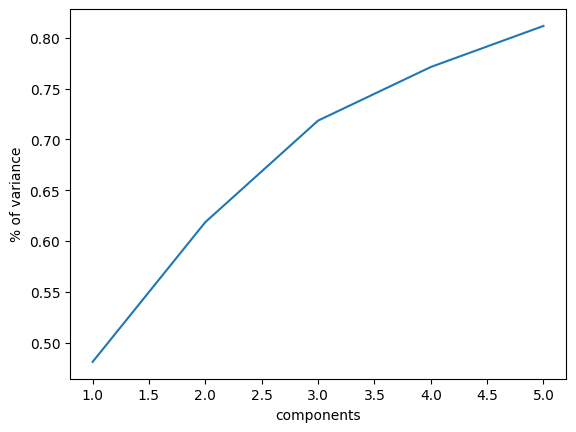

In [34]:
n = 5
sklearn_pca = PCA(n_components=n,random_state=1)
ind=[]
for i in range(n):
    ind.append("PC"+str(i+1))
xpca = sklearn_pca.fit_transform(stdtab)
varx=sklearn_pca.explained_variance_ratio_
plt.plot(np.arange(1,n+1),varx.cumsum())
plt.ylabel("% of variance")
plt.xlabel("components")

Plot the 5 components:

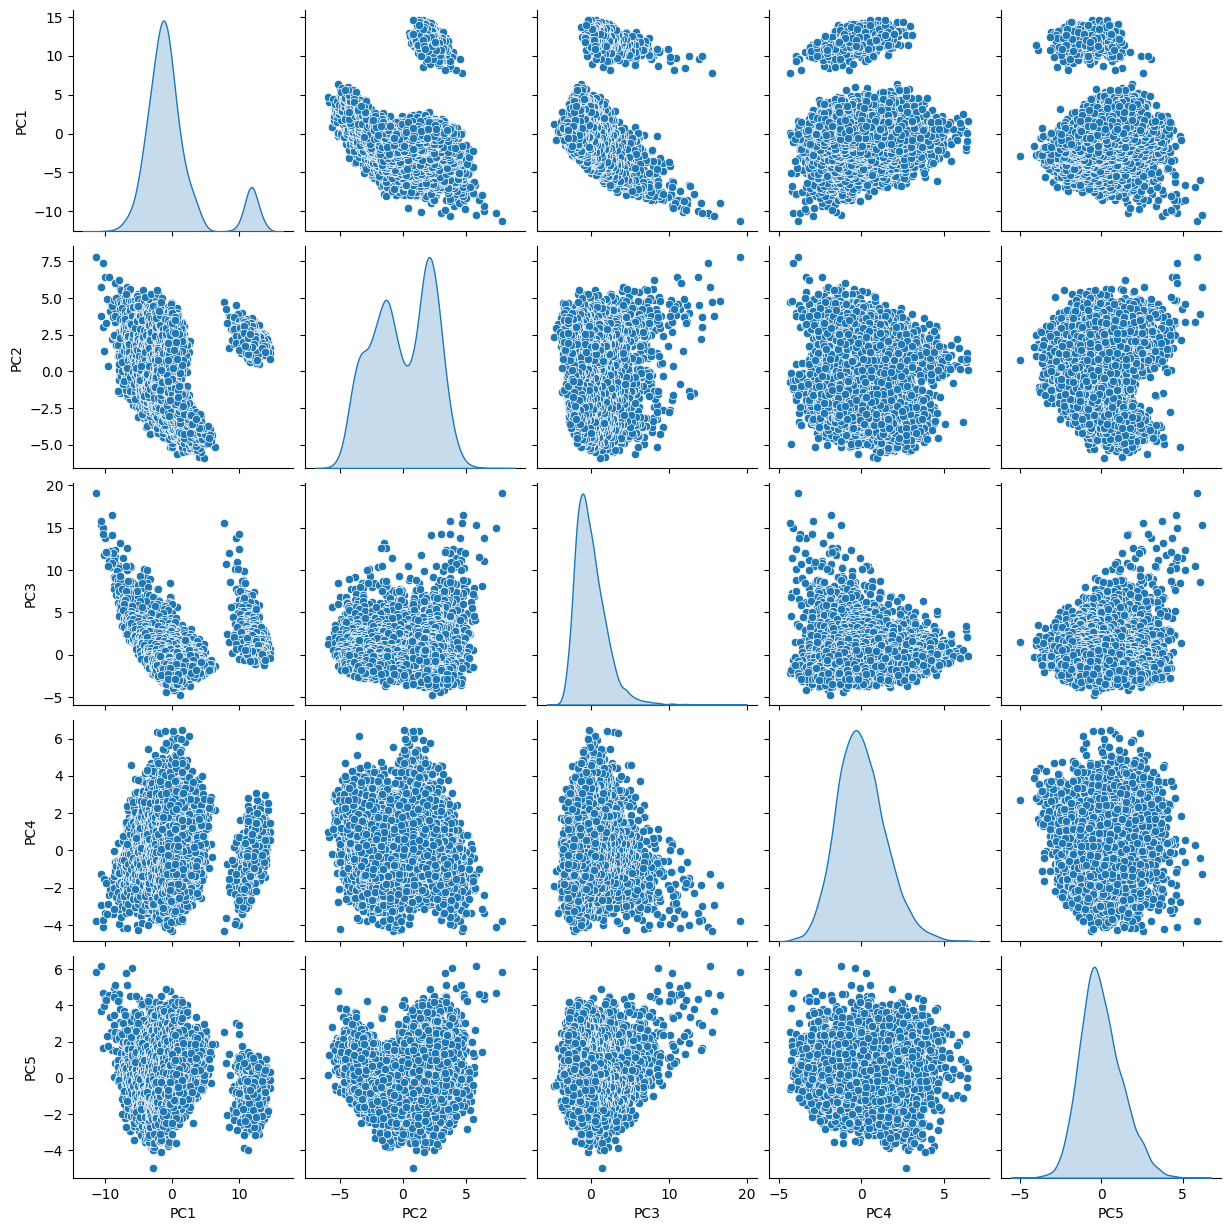

In [35]:
transtab = pd.DataFrame(xpca,columns=ind)
sns.pairplot(transtab,diag_kind="kde")

### 2.7 - Can we automatize the pattern recognition?

We can use DBSCAN to find clusters in the data.

3 clusters were were found.


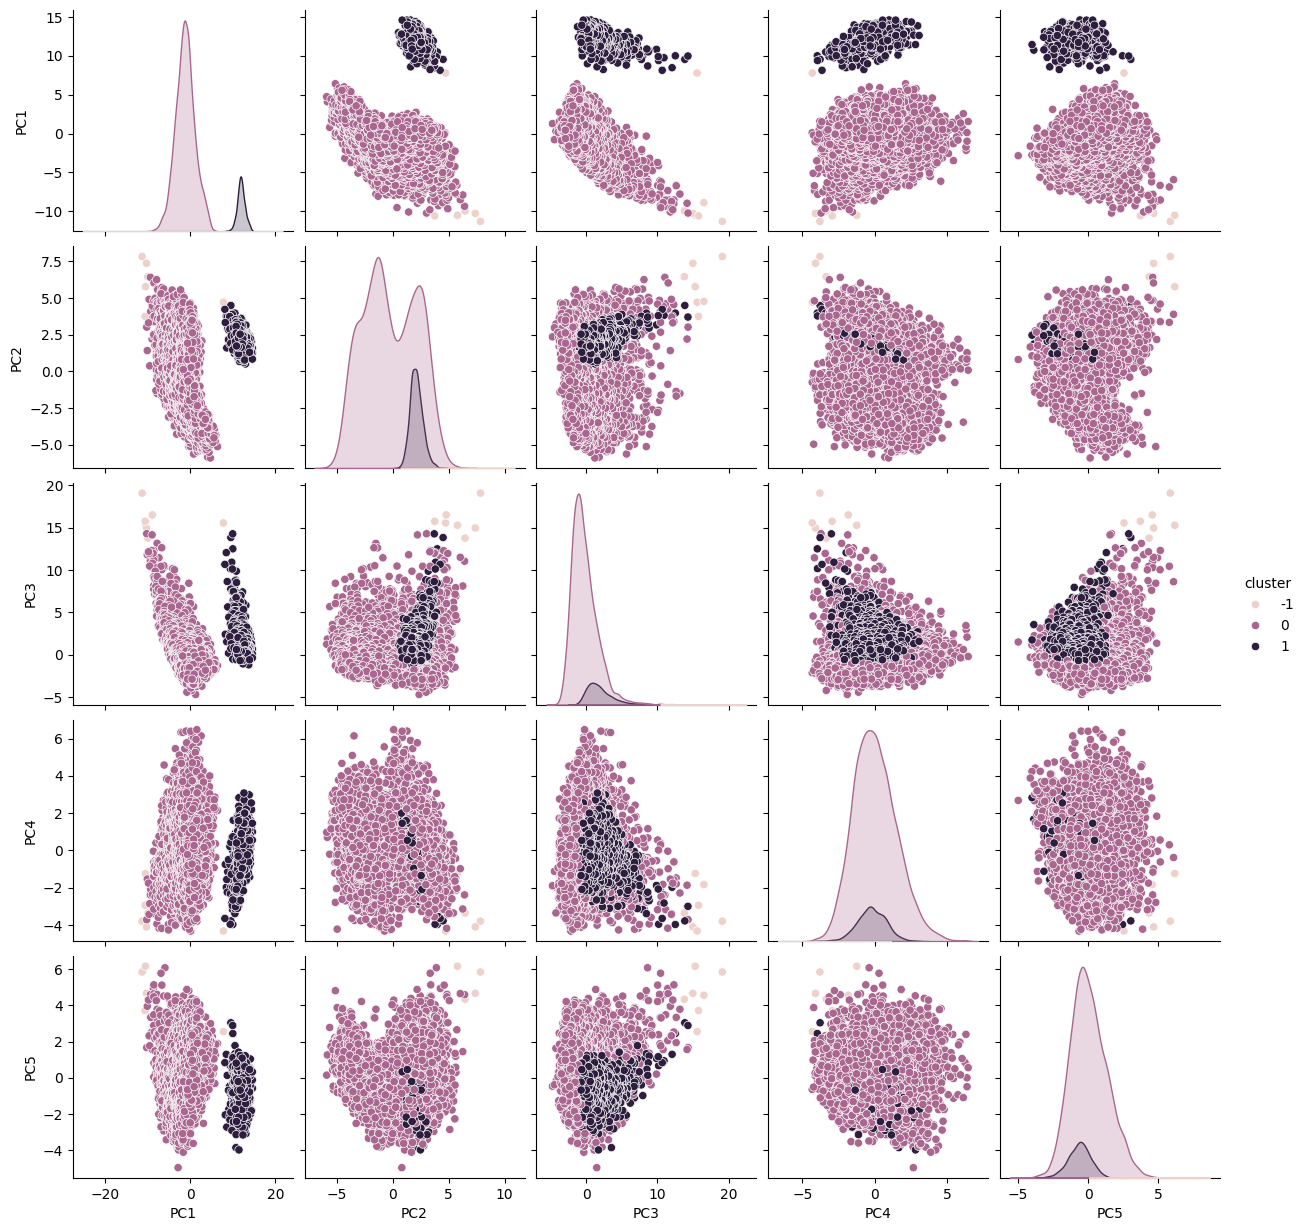

In [36]:
from sklearn.cluster import DBSCAN
#from ipywidgets import interact

rad = 5.0
db = DBSCAN(rad,min_samples=50).fit(xpca)  
transtab['cluster']=db.labels_
print( f"{len(np.unique(db.labels_))} clusters were were found.")
sns.pairplot(transtab,vars=ind, hue="cluster") # Plot.

In [37]:
print(f"Players in each cluster can be listed by changing the cluster label to be either {np.unique(db.labels_)}")
_label = 0
tclust2 = table[transtab['cluster']==_label]
tclust2[['Name','Age','Nationality','Club', "ValueNum", "WageNum"]]

Players in each cluster can be listed by changing the cluster label to be either [-1  0  1]


,Name,Age,Nationality,Club,ValueNum,WageNum
6,L. Modrić,32,Croatia,Real Madrid,67.000,0.420
8,Sergio Ramos,32,Spain,Real Madrid,51.000,0.380
11,R. Lewandowski,29,Poland,FC Bayern München,77.000,0.205
12,T. Kroos,28,Germany,Real Madrid,76.500,0.355
13,D. Godín,32,Uruguay,Atlético Madrid,44.000,0.125
...,...,...,...,...,...,...
13720,W. Al Anazi,23,Saudi Arabia,Al Shabab,0.425,0.005
13721,W. Jobello,24,France,GFC Ajaccio,0.400,0.001
13722,Rafhael Lucas,25,Brazil,Jaguares de Córdoba,0.400,0.001
13723,Luo Xin,28,China PR,Beijing Renhe FC,0.280,0.002


* What about other clusters in the data? Let's see what is within label -1:

In [38]:
_label = -1
tclust1 = table[transtab['cluster']==_label]
tclust1[['Name','Age','Nationality','Club', "ValueNum", "WageNum"]]

,Name,Age,Nationality,Club,ValueNum,WageNum
0,L. Messi,31,Argentina,FC Barcelona,110.5,0.565
1,Cristiano Ronaldo,33,Portugal,Juventus,77.0,0.405
2,Neymar Jr,26,Brazil,Paris Saint-Germain,118.5,0.290
3,De Gea,27,Spain,Manchester United,72.0,0.260
4,K. De Bruyne,27,Belgium,Manchester City,102.0,0.355
5,E. Hazard,27,Belgium,Chelsea,93.0,0.340
7,L. Suárez,31,Uruguay,FC Barcelona,80.0,0.455


The latter cluster contains 8 players (the top ones according to metrics).

### Summary

In this notebook, we have done a brief introduction to Machine Learning and Exploratory Data Analysis in Python. We first coded a reactive agent and a learning agent, and then learned how data size and wrong labels impact it. After,  we used four common libraries for reading tabular data, clean data, do exploratory plotting and used a common automated clustering algorithms.